In [53]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import time
from datetime import datetime
import arch
from arch import arch_model
# Kalkylerar risk med vollatilitet genom följande
# Testar skriv ut volatilitet
# Testar Arch
# Testar GARCH (Generalized autoregressive conditional heteroskedasticity)
# adjusted är default i yfinance.



In [54]:
RISKY_ASSET = "^OMX"
START_DATE = "2016-01-01"
END_DATE = "2022-12-31"

In [55]:
df = yf.download(RISKY_ASSET, 
                 start=START_DATE, 
                 end=END_DATE, 
                 )

[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': '^OMX returns: 2016-01-01 - 2022-12-31'}, xlabel='Date'>

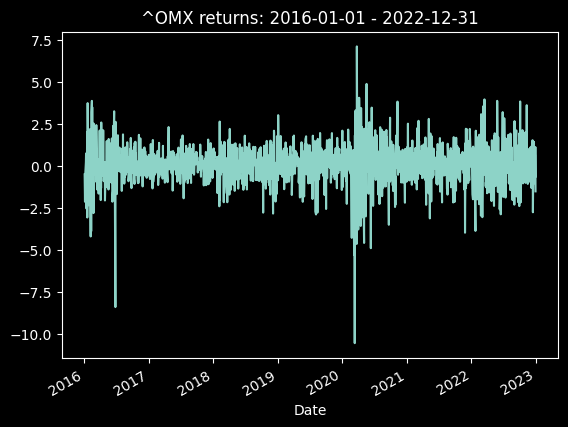

In [56]:
# Daglig handel, kalkylerar procent förändring för stängn. kurs:
returns = 100 * df["Adj Close"].pct_change().dropna()
returns.name = "asset_returns"
returns.plot(
    title=f"{RISKY_ASSET} returns: {START_DATE} - {END_DATE}"
)
# Ovan skapar graf så man kan se volatiliteten om den klustrar i låg eller i peakar.

In [57]:
# Gör Zero som medelvärdesmodell,finns: Constant, Zero, LS, AR, ARX, HAR and HARX
# och sätt p och q i arch, skriv ut summering:
model = arch_model(returns, mean="Zero", vol="ARCH", p=1, q=0)
fitted_model = model.fit(disp="off")
print(fitted_model.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -2723.49
Distribution:                  Normal   AIC:                           5450.98
Method:            Maximum Likelihood   BIC:                           5461.92
                                        No. Observations:                 1757
Date:                Wed, May 31 2023   Df Residuals:                     1757
Time:                        22:29:34   Df Model:                            0
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9996  8.930e-02     11.193  4.433e-29 [  0.825,  1.17

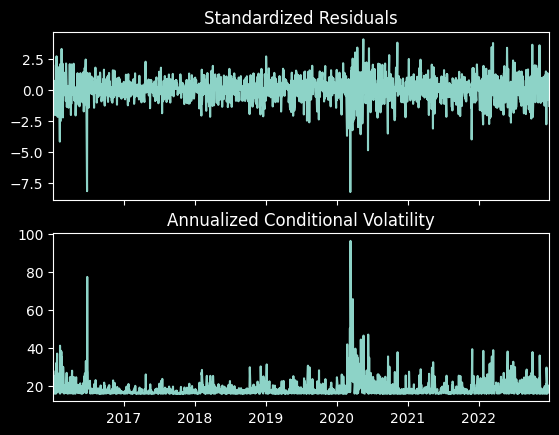

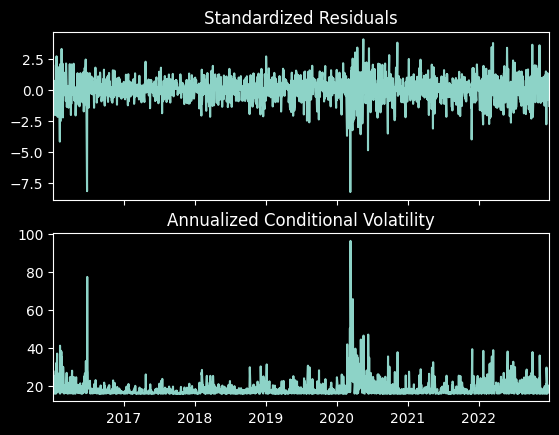

In [58]:
# Plottar residualer och årsvis villkorsberoende volla:
fitted_model.plot(annualize="D")

In [59]:
from statsmodels.stats.diagnostic import het_arch
het_arch(fitted_model.resid)
# Lagrange Multiplier test (LM test
# även benämns Engle’s Test for Autoregressive Conditional Heteroscedasticity)
# Modellens alla ARCH effekter skall vara med.

(260.76428475145485,
 2.950133179773199e-50,
 30.458613911913854,
 1.4061364660338123e-54)

In [60]:
# 1:a LMtest, 3:e tftest 2:a och 4:e är p-värde för dem, mindre än 0.5 = hittar ej alla arch effekter i vollan.

In [61]:
# Testa Garch istället, modell start:
df = yf.download("^OMX",start="2016-01-01",end="2022-12-31")
returns = 100 * df["Adj Close"].pct_change().dropna()
returns.name = "asset_returns"

[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Analytisk prognos för olika horisonter'}, xlabel='Date'>

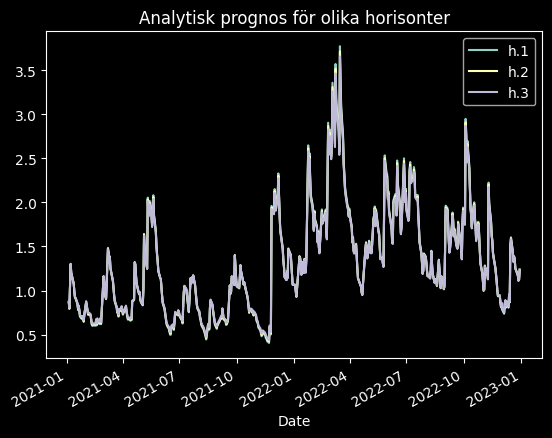

In [62]:
model = arch_model(returns, mean="Zero", vol="GARCH", dist="t",
                   p=1, q=1)
# Datum för splitt
SPLIT_DATE = datetime(2021, 1, 1)
fitted_model = model.fit(last_obs=SPLIT_DATE, disp="off")
# Gör analytisk prognos 
forecasts_analytical = fitted_model.forecast(horizon=3, start=SPLIT_DATE, reindex=False)
forecasts_analytical.variance.plot(title="Analytisk prognos för olika horisonter")

In [63]:
forecasts_analytical.variance
# Skapar h-step framåt, genereras för de 3 horisonterna:

,h.1,h.2,h.3
Date,,,
2021-01-04,0.861477,0.867784,0.873949
2021-01-05,0.790041,0.797945,0.805671
2021-01-07,1.302731,1.299172,1.295693
2021-01-08,1.201930,1.200625,1.199349
2021-01-11,1.103822,1.104710,1.105578
...,...,...,...
2022-12-23,1.254496,1.252016,1.249591
2022-12-27,1.174034,1.173352,1.172686
2022-12-28,1.112001,1.112706,1.113396


<Axes: title={'center': 'Simulation forecasts for different horizons'}, xlabel='Date'>

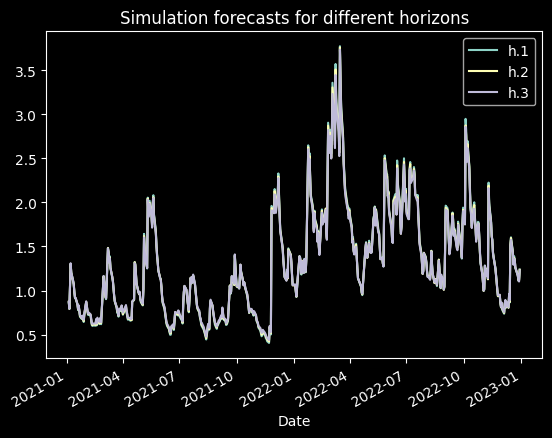

In [64]:
# SIMULERING av prognos horisont(~prognoslängd till stop): splittar 1,2,3:
forecasts_simulation = fitted_model.forecast(
    horizon=3, 
    start=SPLIT_DATE, 
    method="simulation", 
    reindex=False
) 
 
forecasts_simulation.variance.plot( 
    title="Simulation forecasts for different horizons" 
)

<Axes: title={'center': 'Bootstrap prognos för olika horisonter'}, xlabel='Date'>

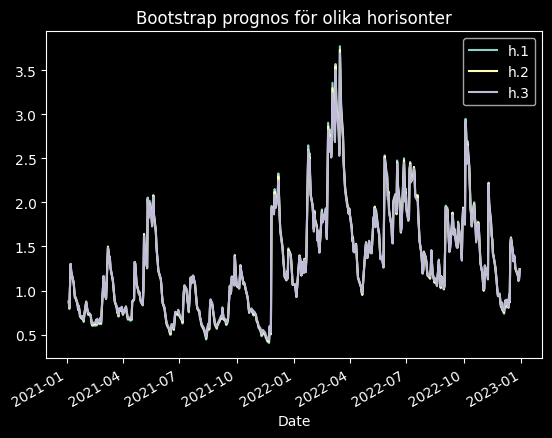

In [65]:
# Gör prognos med bootstrap
forecasts_bootstrap = fitted_model.forecast(horizon=3,
                                            start=SPLIT_DATE,
                                            method="bootstrap",
                                            reindex=False)
forecasts_bootstrap.variance.plot(
    title="Bootstrap prognos för olika horisonter"
)

<Axes: title={'center': 'Bootstrap prognos för olika horisonter'}, xlabel='Date'>

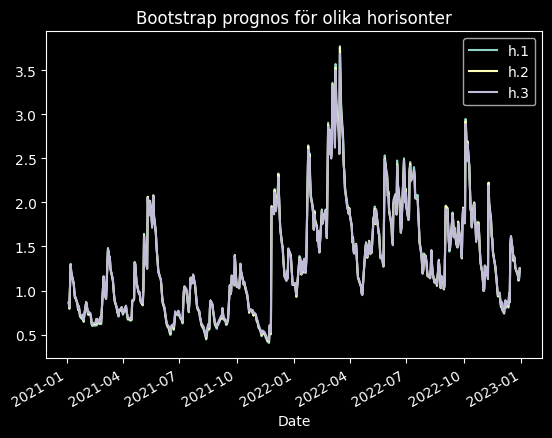

In [66]:
forecasts_bootstrap = fitted_model.forecast(horizon=3,
                                            start=SPLIT_DATE,
                                            method="bootstrap",
                                            reindex=False
                                            )
forecasts_bootstrap.variance.plot(
    title="Bootstrap prognos för olika horisonter"
)